# Interpolation and Regression on Consumer Trends

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#  Data Generation

In [37]:
# Set seed for reproducibility
np.random.seed(0)

# Data Generation
years = np.arange(2000, 2024)
consumer_spending = 50 * (years - 2000) + np.random.normal(loc=0, scale=50, size=len(years)) + 500

In [39]:
# Introduce Missing Data
missing_years = np.random.choice(years, size=5, replace=False)
consumer_spending_with_missing = consumer_spending.copy()
consumer_spending_with_missing[np.isin(years, missing_years)] = np.nan

In [41]:
# Prepare DataFrame with Improved Data
improved_data = pd.DataFrame({
    "Year": years,
    "Consumer Spending": consumer_spending_with_missing
})

In [43]:
# Interpolate missing data
improved_data['Consumer Spending Interpolated'] = improved_data['Consumer Spending'].interpolate(method='spline', order=2)

# Splitting the dataset into training and testing sets
X_improved = improved_data['Year'].values.reshape(-1, 1)
y_improved = improved_data['Consumer Spending Interpolated'].values
X_train, X_test, y_train, y_test = train_test_split(X_improved, y_improved, test_size=0.2, random_state=0)

In [45]:
# Fit the model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [51]:
# Evaluation
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Visualization

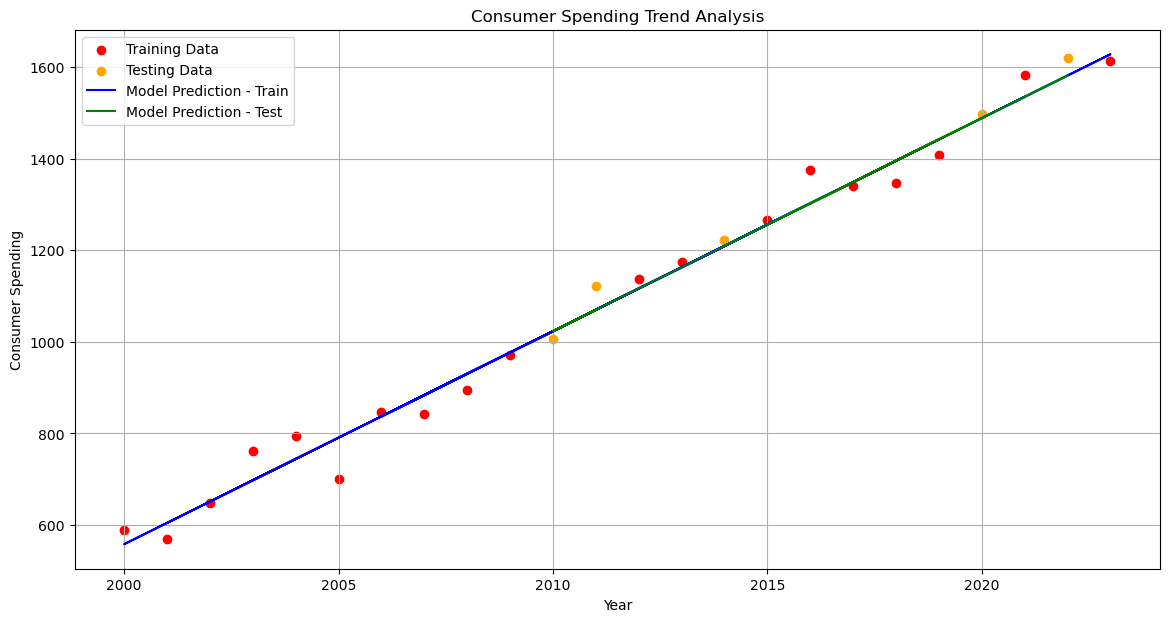

In [58]:
plt.figure(figsize=(14, 7))
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.scatter(X_test, y_test, color='orange', label='Testing Data')
plt.plot(X_train, y_train_pred, color='blue', label='Model Prediction - Train')
plt.plot(X_test, y_test_pred, color='green', label='Model Prediction - Test')
plt.title('Consumer Spending Trend Analysis')
plt.xlabel('Year')
plt.ylabel('Consumer Spending')
plt.legend()
plt.grid(True)
plt.show()


# Training And Testing

In [60]:
# Print MSE and R^2 for training and testing sets
print(f"Training MSE: {mse_train}, R^2: {r2_train}")
print(f"Testing MSE: {mse_test}, R^2: {r2_test}")

Training MSE: 1681.3545639267475, R^2: 0.9845270654680625
Testing MSE: 967.3869254440851, R^2: 0.9817751973333513
